<h2>
<span style="color:#6852A3">
Мазур Анастасия Вадимовна, 316
</span>
</h2>

<span style="color:#410083">
<h1>
Анализ данных, связанных с баскетбольными игроками NBA
</h1>
</span>

Данное задание необходимо было реализовать на собственных данных. Я захотела проанализировать такой датасет, тема которого мне близка и интересна. </br>
К тому же, эти данные очень понятны, конкретны и показательны. Это позволяет самостоятельно выдвигать логичные гипотезы и проверять результаты на правдоподобность. 

Устанавливаем необходимые библиотеки Python для дальнейшей работы.

In [ ]:
import pip
pip.main(["install", "matplotlib"])
pip.main(["install", "scikit-learn"])
pip.main(["install", "scikit-image"])
pip.main(["install", "umap-learn"])
pip.main(["install", "n5py"])
pip.main(["install", "pingouin"])
pip.main(["install", "hyperopt"])
pip.main(["install", "ipywidgets"])
pip.main(["install", "keras"])
pip.main(["install", "lightgbm"])
pip.main(["install", "numpy"])
pip.main(["install", "outlier_utils"])
pip.main(["install", "pandas"])
pip.main(["install", "plotly"])
pip.main(["install", "scipy"])
pip.main(["install", "seaborn"])
pip.main(["install", "scikit"])
pip.main(["install", "torch"])
pip.main(["install", "torchvision"])
pip.main(["install", "tqdm"])
pip.main(["install", "umap"])
pip.main(["install", "xgboost"])
pip.main(["install", "pep8"])
pip.main(["install", "statsmodels"])
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from scipy import stats
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline
my_color = '#6852A3'
warnings.filterwarnings("ignore") # specify to ignore warning messages


Данные я брала из открытого источника [DatasetHub](www.datasethub.com). </br>
В разных заданиях датасеты отличаются. Это потому что одни таблицы мне казались более удобными для реализации конкретного задания, потому что имели больше необходимых мне данных, которые я хотела рассмотреть, проанализировать и визуализировать. </br></br>
Давайте же ознакомимся с этими таблицами.

```NBA_STATS``` </br>
Табличка с характеристиками игроков и их основными игровыми показателями. </br>
В таблице 490 записей про действующих на данный момент игроков NBA.

In [2]:
nba_stats = pd.read_csv("/Users/mazur/Desktop/PRAK_5sem/nba/players_stats.csv")
nba_stats

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Xavier Henry,9,86,20,3,13,23.1,0,0,0.0,...,24.0,be,"March 15, 1991",University of Kansas,4,195.0,SF,LAL,99.00,26.035503
486,Zach LaVine,77,1902,778,286,677,42.2,57,167,34.1,...,20.0,us,"March 10, 1995","University of California, Los Angeles",R,192.5,PG,MIN,85.05,22.951594
487,Zach Randolph,71,2304,1143,454,932,48.7,7,20,35.0,...,34.0,us,"July 16, 1981",Michigan State University,13,202.5,PF,MEM,117.00,28.532236
488,Zaza Pachulia,73,1730,606,240,529,45.4,0,3,0.0,...,31.0,ge,"February 10, 1984",NaN,11,207.5,C,MIL,121.50,28.218900


```NBA_PLAYERS```</br>
Таблица побольше. Здесь уже целых 12305 записей о всех игроках NBA, которые когда либо играли в лиге.

In [3]:
nba_players = pd.read_csv("/Users/mazur/Desktop/PRAK_5sem/nba/all_players.csv")
nba_players

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


```NBA_SEASONS```</br>
Совсем большая табличка, 24691 строка с информацией о различных игроках конкретно в каждом игровом сезоне.</br> Позволяет учитывать временной аспект: сравнивать результаты за разные годы, делать прогнозы.

In [4]:
nba_seasons = pd.read_csv("/Users/mazur/Desktop/PRAK_5sem/nba/Seasons_Stats.csv")
nba_seasons

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


<span style="color:#6852A3">
<h2> 
1. Аппроксимация  распределений  данных  с  помощью ядерных оценок. 
</h2>
</span>

Существует мнение, что баскетбол - игра для высоких людей.</br>
Давайте же проанализируем данные и выясним, как распределён рост игроков.

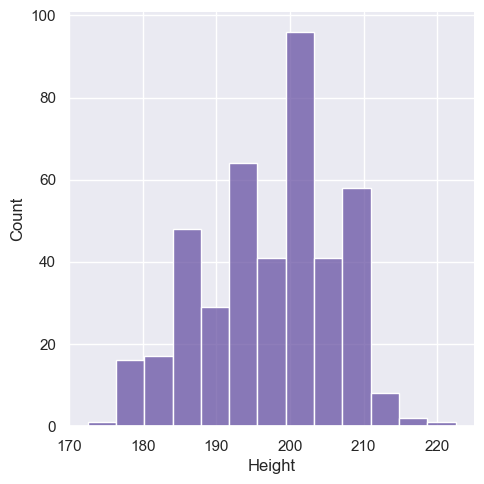

In [5]:
sns.displot(x = 'Height', data = nba_stats, color = my_color)

Как во всех командных играх, в баскетболе у каждого игрока есть своя роль и функции. Это определяется его позицией. </br>
Итак, в баскетболе существует 5 позиций:
1. PG - Point Guard (Разыгрывающий защитник)
2. SG - Shooting Guard (Атакующий защитник)
3. SF - Small Forward (Лёгкий форвард)
4. PF - Power Forward (Тяжёлый форвард)
5. C - Center (Центровой)

**Гипотеза**: Существует корреляция между ростом игрока и его позицией на площадке. </br>
Выделим подмножества данных на нашей гистограмме.

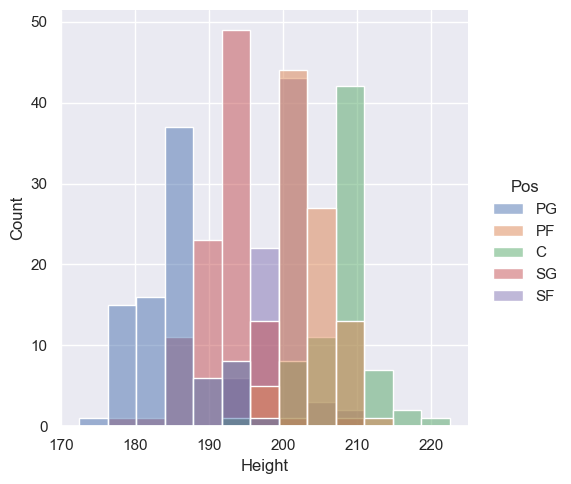

In [6]:
sns.displot(x = 'Height', hue = 'Pos', data = nba_stats)

Для того, чтобы показать это более наглядно, отрисуем гистограммы по росту игроков на каждой из позиций отдельно.</br> А также добавим линию, которая будет отражать характер распределения.</br>
</br>

Для этого используется **метод ядерной оценки плотности**.</br></br>

_**Ядерная оценка плотности (ЯKernel Density Estimation, KDE)** — это непараметрический способ оценки плотности случайной величины. Ядерная оценка плотности является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных._</br></br>


Данный метод уже реализован в библиотечной функции `displot`, необходимо просто включить параметр `kde` в аргументах функции. Но каков его принцип работы?</br>
1. Сначала для каждой точки наблюдений строится график нормального распределения с центром в этой точке.</br>
2. Значения каждой нормальной кривой суммируются, а затем полученное значение нормализуется так, чтобы площадь под результирующей кривой стала равна 1.</br>
3. Полученный график сглаживается в зависимости от выбора **полосы пропускания**.</br>
</br>

_**Полоса пропускания ядра** является свободным параметром, который оказывает сильное влияние на результат оценки._</br></br>
Здесь я использую ту пропускную способность, которую предложил `matplotlib` на основе моих данных, считая такое значение наиболее оптимальным.

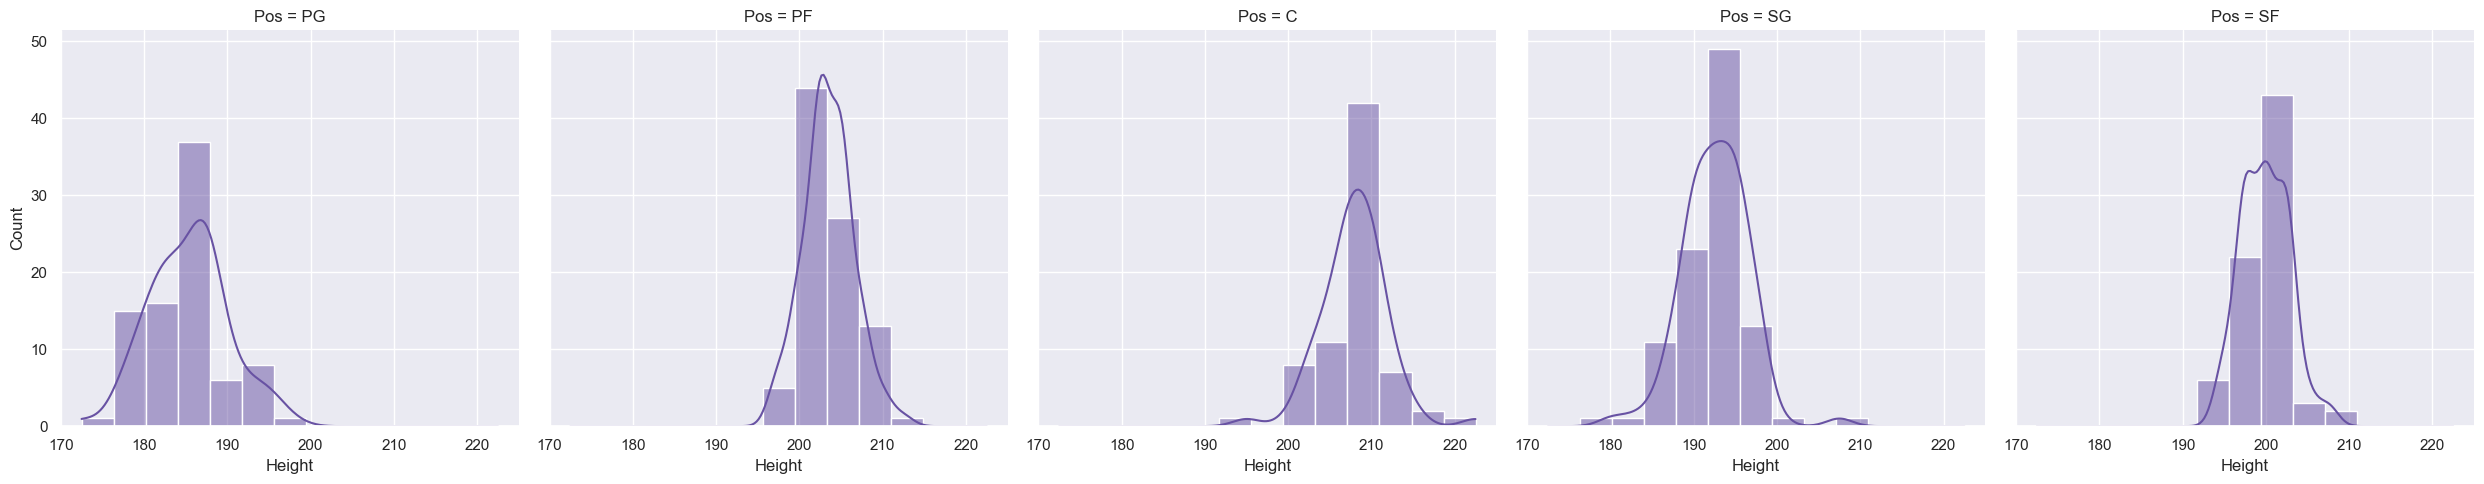

In [7]:
sns.displot(x = 'Height', col = 'Pos', kde = True, data = nba_stats, color = my_color)

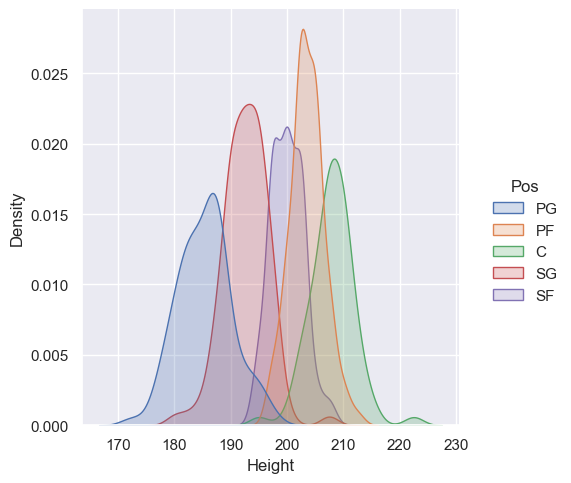

In [8]:
sns.displot(x = "Height",
            hue = "Pos",
            kind = "kde",
            fill = True,
            data = nba_stats);

Таким образом, мы убедились в том, что рост игроков распределён в соответсвии с их позициями, тем самым подтвердив гипотезу наглядно.</br>
Действительно, более низкие игроки обычно играют на позиции PG - Point Guard (Разыгрывающий), потому что обладают большой скоростью и манёвренностью.</br>
Высокие же игроки играют на позиции C - Center (Центровой), потому что пользуясь преимуществами своего роста и комплекции, они могут легко зарабатывать очки под кольцом и отлично защищаться.</br></br>

Вообще, позиция игрока являеется очень хорошей качественной переменной (фактором), потому что позволяет отследить много зависимостей. Поэтому в последующих заданиях будет часто использоваться.

<span style="color:#6852A3">
<h2>
2. Анализ данных с помощью cdplot, dotchart, boxplot, stripchart.
</h2>
</span>

**<span style="color:#410083">
cdplot:
</span>**

Для визуализации связи между двумя переменными, одна из которых является количественной, а другая качественной (фактором), можно использовать диаграмму размахов.  Если зависимой является качественная переменная, то удобно воспользоваться одной из базовых графических функций R - `cdplot()`, позволяющей совмещать на одном графике плотности вероятности для каждого уровня интересующей исследователя качественной переменной (англ. conditional density plot).

Аналогом этой функции в Python служит всё та же функция `displot()` из библиотеки `seaborn`, которую мы уже использовали ранее при работе с ядерными оценками. Теперь же добавляем параметр `multiple = "fill"`, чтобы видеть график именно в том виде, который строит `cdplot()`.

Давайте посмотрим на то, игроки каких позиций больше очков приносят команде. Для этого обратимся к таблице `NBA SEASONS` и рассмотрим игры за 2017 год. </br>
На графике отражаю распределение по количеству набранных очков игроками с разных позиций.

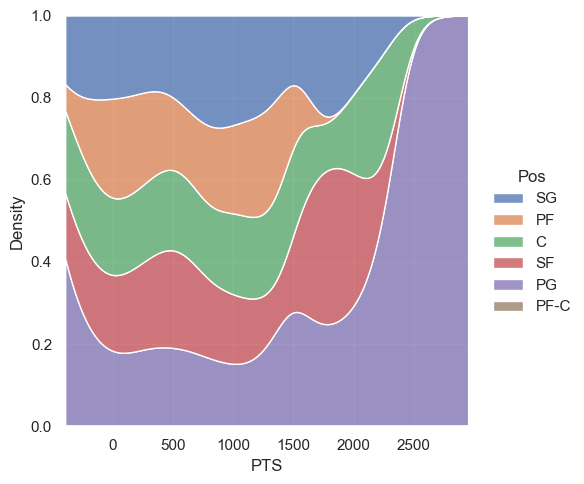

In [9]:
sns.displot(data = nba_seasons[nba_seasons['Year']==2017], hue = "Pos", multiple = "fill", x = "PTS", kind = "kde")

Сильно выделяются игроки разыгрывающей позиции (PG). Если кто и зарабатывает отличительно большое количество очков - это именно они. </br>
Игроки остальных позиций в среднем зарабатывают одинаковое количество очков.

**<span style="color:#410083">
dotchart:
</span>**

**Точечный график** как представление распределения состоит из группы точек данных, нанесенных на простой масштаб. Точечные диаграммы используются для непрерывных , количественных , одномерных данных.
Точечные графики - это один из простейших статистических графиков, который подходит для небольших и средних наборов данных. Они полезны для выделения кластеров и пробелов, а также выбросов . Другое их преимущество - сохранение числовой информации. При работе с большими наборами данных (около 20–30 или более точек данных) связанный стержневой график , прямоугольная диаграмма или гистограмма могут быть более эффективными, так как точечные графики после этого момента могут стать слишком загроможденными. Точечные графики можно отличить от гистограмм тем, что точки не расположены равномерно по горизонтальной оси.

Хотя сюжет кажется простым, его расчет и лежащая в его основе статистическая теория непросты. Алгоритм вычисления точечной диаграммы тесно связан с оценкой плотности ядра . Выбранный размер точек влияет на внешний вид сюжета. Выбор размера точки эквивалентен выбору полосы пропускания для оценки плотности ядра.



В R это реализуется с помощью функции `dotchart()`, в Python аналогичный график строится при помощи функции `scatter()`.

Итак, нам нужно небольшое количество данных. Рассмотрим игровые показатели команды Golden State Warriors (GSW) за игровой сезон 2017 года и отметим на точечном графике количество реализованных двухочковых бросков (2P) у различных игроков.

In [10]:
gsw_2017 = nba_seasons[nba_seasons['Year']==2017][nba_seasons['Tm']=='GSW']
import plotly.express as px
fig = px.scatter(gsw_2017, y = "Player", x = "2P", height=600, color = "Pos")
fig.update_yaxes(type='category', tickvals=gsw_2017['Player'].tolist())
fig.show()

**<span style="color:#410083">
boxtplot:
</span>**

**Диаграммы размаха («ящик с усами») (Box and Whisker Plot или Box Plot)** – это удобный способ визуального представления групп числовых данных через квартили.

Прямые линии, исходящие из ящика, называются «усами» и используются для обозначения степени разброса (дисперсии) за пределами верхнего и нижнего квартилей. Выбросы иногда отображаются в виде отдельных точек, находящихся на одной линии с усами. Диаграммы размаха могут располагаться как горизонтально, так и вертикально.

Диаграммы размаха, как правило, используются в описательной статистике и позволяют быстро исследовать один или более наборов данных в графическом виде. Несмотря на то, что в сравнении с гистограммой или графиком плотности, этот график может показаться примитивным, его преимущество – в экономии пространства, что особенно удобно при сравнении распределений между большим количеством групп или наборов данных.

Виды наблюдений, которые можно сделать на основе ящика с усами:

- Каковы ключевые значения, например: средний показатель, медиана 25го перцентиля и так далее.

- Существуют ли выбросы и каковы их значения.

- Cимметричны ли данные.

- Насколько плотно сгруппированы данные.

- Смещены ли данные и, если да, то в каком направлении.

<p align="center"><img
 src = "/Users/mazur/Desktop/PRAK_5sem/box_plot.svg"
 alt= "drawing"
 width= "400"
/></p>



<AxesSubplot: xlabel='PTS', ylabel='Pos'>

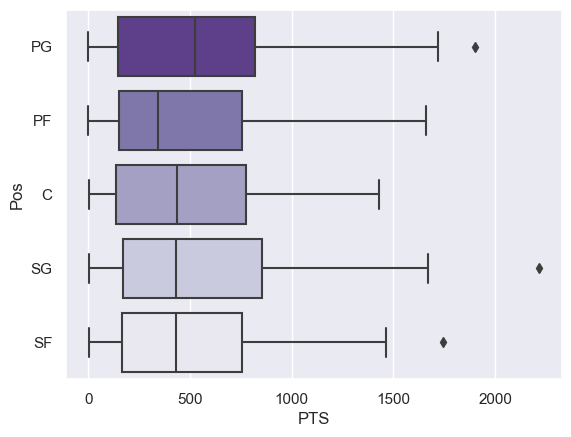

In [11]:
sns.boxplot(data = nba_stats, y = "Pos", x = "PTS", palette="Purples_r")

Из данного графика видно, что медианное значение количества забитых трёхочковых бросков у игроков разыгрывающей позиции (PG) заметно больше, чем у других игроков. Размах в целом примерно одинаков. Случаются выбросы.

<AxesSubplot: xlabel='AST', ylabel='Pos'>

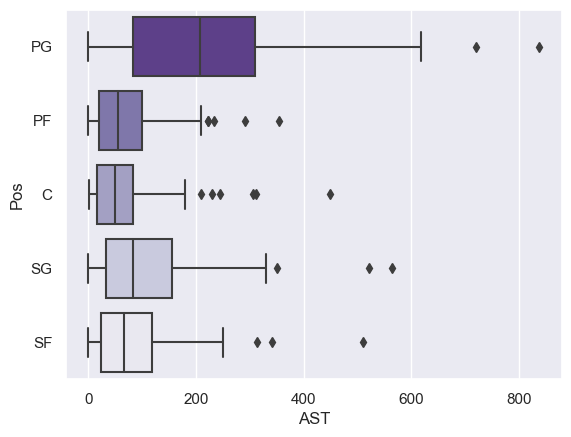

In [12]:
sns.boxplot(data = nba_stats, y = "Pos", x = "AST", palette="Purples_r")

На данном графике рассмотрели количество результативных передач (Assists). У разыгрывающих их принципиально больше: больше медианное значение и сам размах в целом шире. Игроки других позиций пасуют сильно меньше.

<AxesSubplot: xlabel='BLK', ylabel='Pos'>

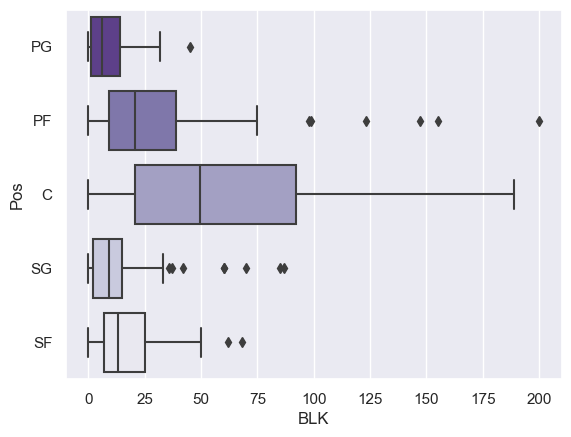

In [13]:
sns.boxplot(data = nba_stats, y = "Pos", x = "BLK", palette="Purples_r")

На этом графике рассмотрим действия игроков в защите - блокшот, то есть ситуация, когда игрок блокирует бросок соперника.</br>
Легко заметить, что центровые игроки выделяются. Блогадаря высокому росту и габаритам, этот приём даётся им лучше всего и они активно его практикуют.
</br></br>
Выбросы тоже случаются, но всё же общая картина даёт понять, что центровые игроки занимают лидирующие места по этому показателю.


**<span style="color:#410083">
stripchart:
</span>**

В языке R функция `stripchart()` отвечает за построение одномерных диаграмм рассеяния. **Диаграмма рассеяния** показывает взаимосвязь между двумя числовыми признаками с помощью точек, показывающих движение этих переменных вместе. </br>
В языке Python такую диаграмму мы можем реализовать с помощью функции `stripplot()`.

На данном графике я отразила количество успешных трёхочковых бросков (каждая отдельная точка - сумма по всем игрокам за сезон) c течением времени.</br></br>

Окунёмся в историю: раньше в баскетболе не практиковались броски с дальних дистанций. Со временем стиль игры менялся и пришла идея ввести трёхочковый бросок в игру. В профессиональный баскетбол трёхочковый бросок проник только в начале 1960-х годов, впервые появившись в 1961 году в правилах Американской баскетбольной лиги. Наконец, в сезоне 1979/80 правило о трёхочковых бросках было принято и в НБА.</br></br>

Именно поэтому на графике до 1979 года совсем нет никаких точек - трёхочковые броски попросту не практиковали или же не трактовали таким образом, потому что данной категории не было в правилах.</br>
Затем дальний бросок стал набирать всё большую популярность. На графике мы можем видеть, что тренд растёт.

In [14]:
nba_3pt = pd.read_csv("/Users/mazur/Desktop/PRAK_5sem/nba/3pt.csv") # вспомогательная таблица, где просто записана сумма количества трёхочковых бросков за каждый год

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

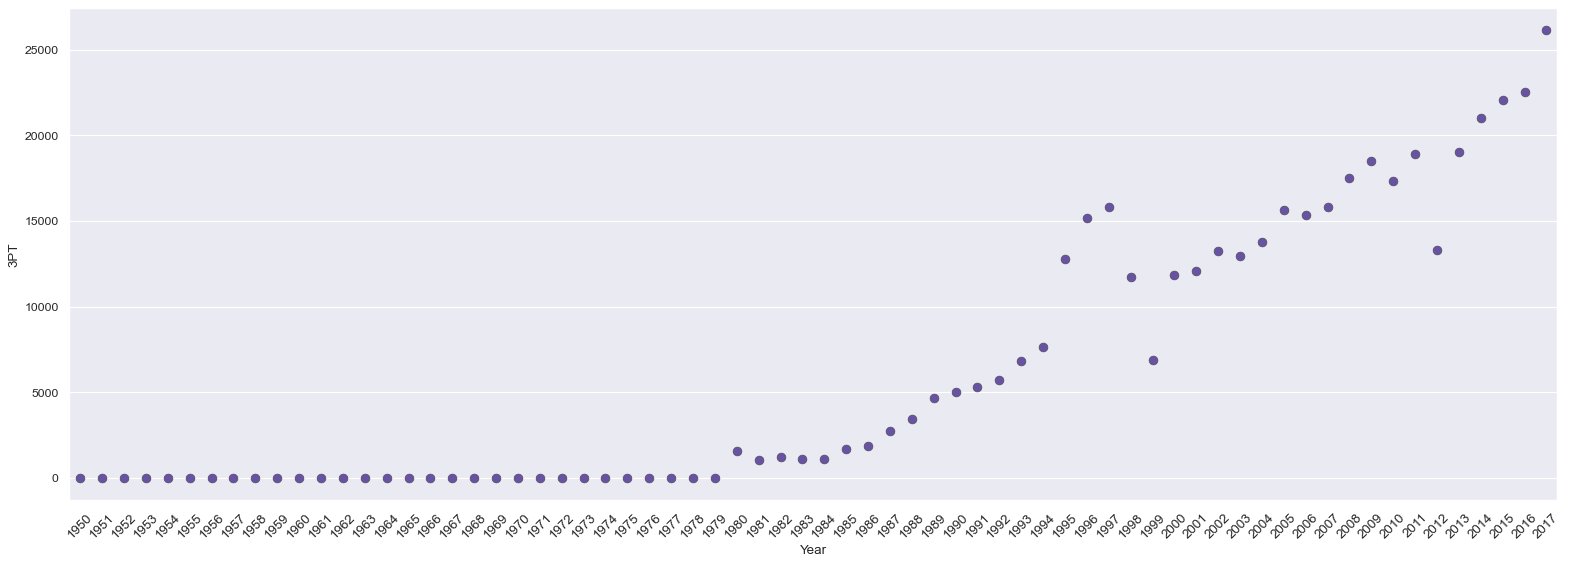

In [15]:
fig, ax = plt.subplots(figsize=(24, 8), dpi=80)
sns.stripplot(nba_3pt, y = '3PT', x = "Year", jitter=0.45, size=8, linewidth=0.5, color="#6852A3")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=45)

plt.show()

<span style="color:#6852A3">
<h2>

3. Проверка, являются ли наблюдения выбросами с точки зрения формальных  статистических  критериев  Граббса  и  Q-теста  Диксона. Визуализация результатов. 

</h2>
</span>

**<span style="color:#410083">
Тест Граббса
</span>**

**Тест Граббса** используется для определения наличия выбросов в наборе данных.

In [16]:
import smirnov_grubbs as grubbs

#perform Grubbs' test to see if minimum value is an outlier
grubbs. max_test_indices (nba_stats['3PM'], alpha=.05)

[433, 281]

In [17]:
print(nba_stats.at[433, 'Name'])

Stephen Curry


Здесь мы посмотрели тест Граббса для максимального значения по количеству реализованных трёхочковых бросков. Выбросом оказался игрок Стефен Карри, который действительно является рекордсменом по числу дальних бросков.

<span style="color:#6852A3">
<h2>

4. Инструменты для  заполнения  пропусков  в данных.  Сравнение  результатов заполнения  с истинными значениями. 
   
</h1>
</span>

В одном из предыдущих заданий мы убедились в том, что существует тенденция роста дальних бросков. И она практические линейная. </br>
Поэтому в этом задании я хочу поработать с этими данными. Для этого возьмём последние 37 содержательных строк таблицы.

In [18]:
df = nba_3pt.tail(37)
df

,Year,3PT
31,1981,1035.0
32,1982,1206.0
33,1983,1091.0
34,1984,1139.0
35,1985,1692.0
36,1986,1886.0
37,1987,2753.0
38,1988,3433.0
39,1989,4678.0
40,1990,5050.0


In [19]:
print(df['Year'][36], ',', df['3PT'][36])
print(df['Year'][42], ',', df['3PT'][42])
print(df['Year'][51], ',', df['3PT'][51])
print(df['Year'][65], ',', df['3PT'][65])

1986 , 1886.0
1992 , 5736.0
2001 , 12087.0
2015 , 22080.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

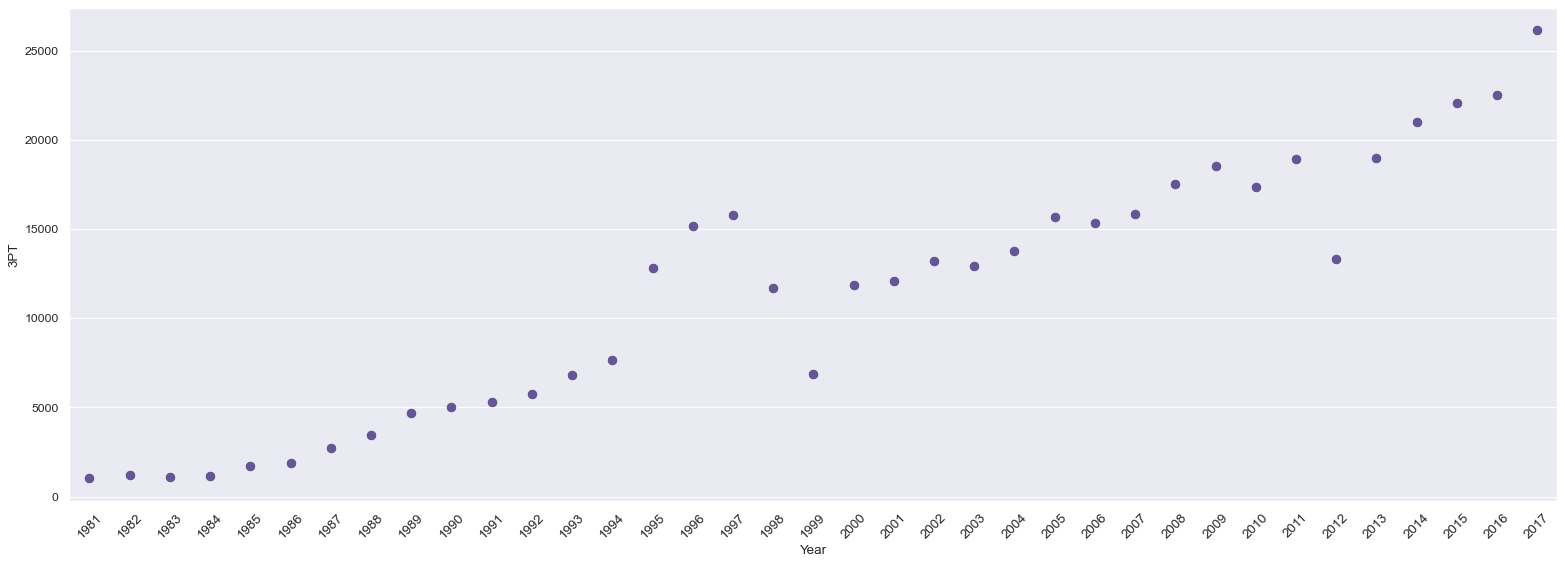

In [20]:
fig, ax = plt.subplots(figsize=(24, 8), dpi=80)
sns.stripplot(df, y = '3PT', x = "Year", jitter=0.45, size=8, linewidth=0.5, color="#6852A3")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=45)

plt.show()

Удалим некоторые строки.

In [21]:
df['3PT'][36] = np.nan
df['3PT'][42] = np.nan
df['3PT'][51] = np.nan
df['3PT'][65] = np.nan

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

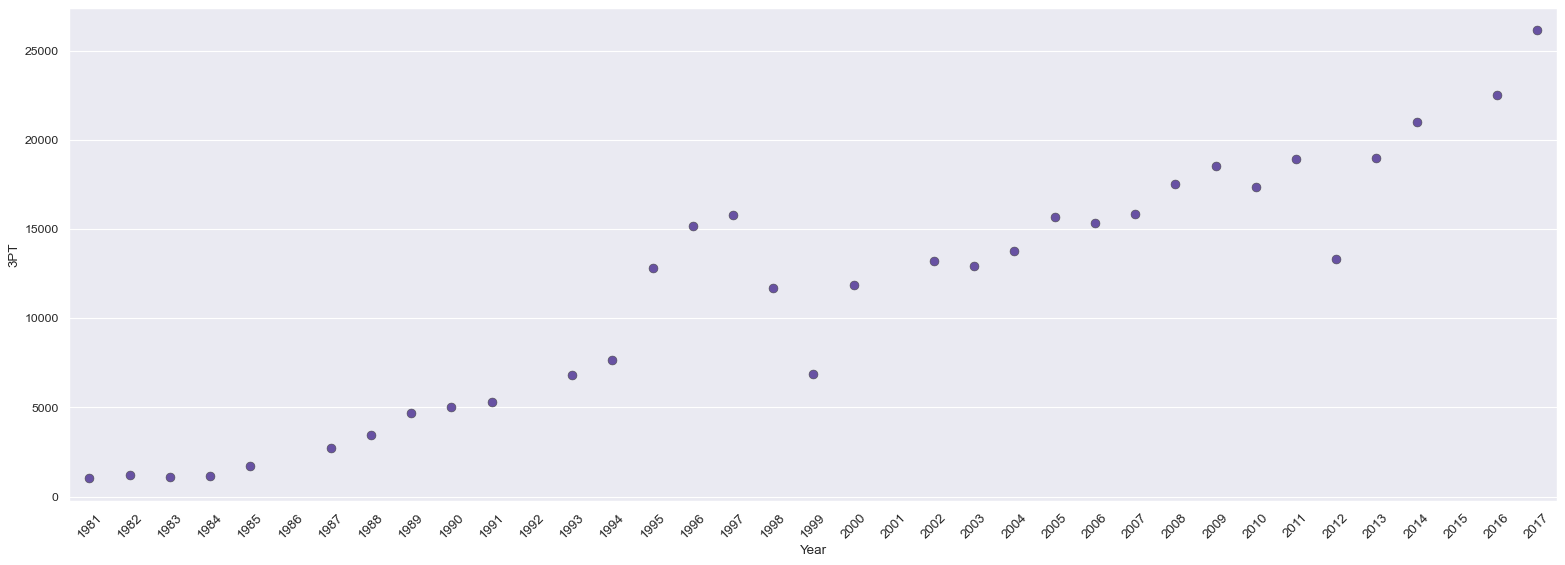

In [22]:
fig, ax = plt.subplots(figsize=(24, 8), dpi=80)
sns.stripplot(df, y = '3PT', x = "Year", jitter=0.45, size=8, linewidth=0.5, color="#6852A3")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=45)

plt.show()

В такой ситуации пропуски лучше заполнять средним по соседним двум значениям.

In [23]:
df['3PT'][36] = (df['3PT'][35] + df['3PT'][37]) / 2
df['3PT'][42] = (df['3PT'][41] + df['3PT'][43]) / 2
df['3PT'][51] = (df['3PT'][50] + df['3PT'][52])/ 2
df['3PT'][65] = (df['3PT'][64] + df['3PT'][66]) / 2

In [24]:
print(df['Year'][36], ',', df['3PT'][36])
print(df['Year'][42], ',', df['3PT'][42])
print(df['Year'][51], ',', df['3PT'][51])
print(df['Year'][65], ',', df['3PT'][65])

1986 , 2222.5
1992 , 6071.5
2001 , 12554.0
2015 , 21764.5


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

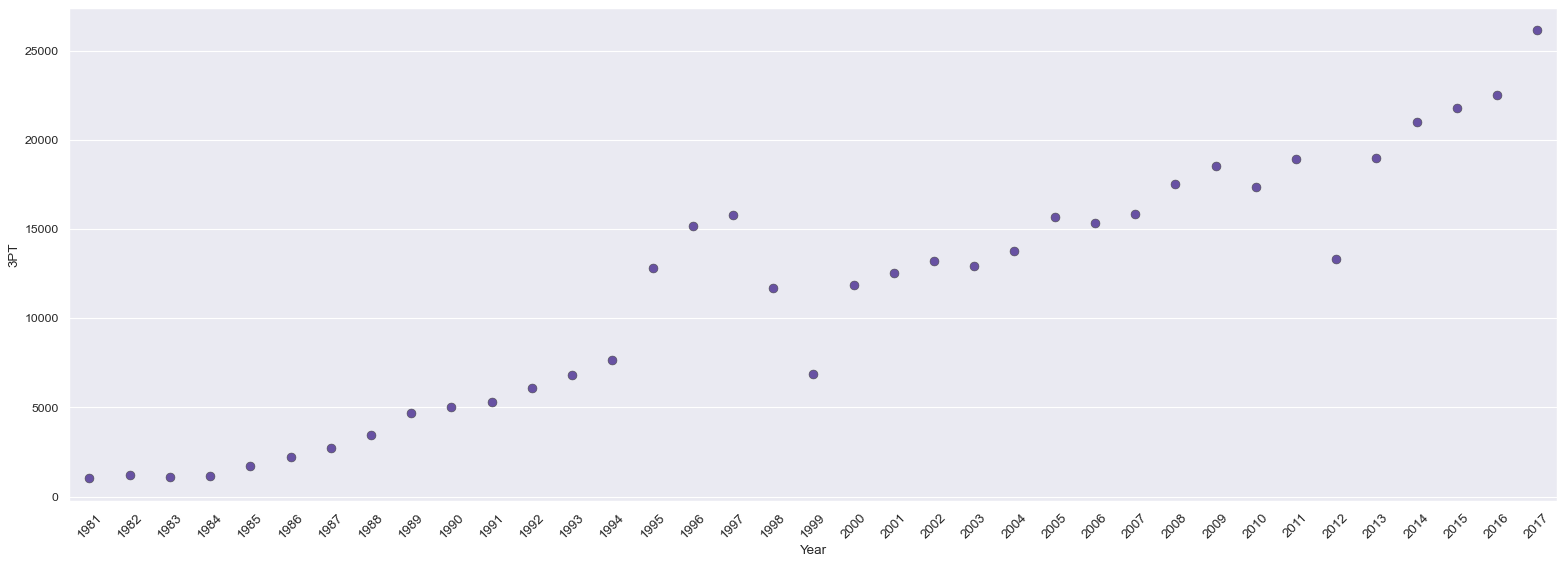

In [25]:
fig, ax = plt.subplots(figsize=(24, 8), dpi=80)
sns.stripplot(df, y = '3PT', x = "Year", jitter=0.45, size=8, linewidth=0.5, color="#6852A3")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=45)

plt.show()

Рассмотрим какое-нибудь распределение, похожее на нормальное. В первом задании мы работали с распределнием роста игроков на разных позициях. Воспользуемся этими данными.

In [26]:
nba_stats_c = nba_stats[nba_stats['Pos']=='C']
nba_stats_c

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
5,Al Jefferson,65,1992,1082,486,1010,48.1,2,5,40.0,...,30.0,us,"January 4, 1985",NaN,10,205.0,C,CHA,130.05,30.945866
8,Alex Kirk,5,14,4,1,4,25.0,0,0,0.0,...,24.0,us,"November 14, 1991",University of New Mexico,R,210.0,C,CLE,110.25,25.000000
9,Alex Len,69,1518,432,179,353,50.7,1,3,33.3,...,22.0,ua,"June 16, 1993",University of Maryland,1,212.5,C,PHO,117.00,25.910035
11,Alexis Ajinca,68,957,443,181,329,55.0,0,0,0.0,...,27.0,fr,"May 6, 1988",NaN,4,215.0,C,NOH,111.60,24.142780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Tiago Splitter,52,1030,428,169,303,55.8,0,0,0.0,...,30.0,br,"January 1, 1985",NaN,4,207.5,C,SAS,110.25,25.606039
446,Tim Duncan,77,2227,1070,419,819,51.2,2,7,28.6,...,39.0,vi,"April 25, 1976",Wake Forest University,17,207.5,C,SAS,112.50,26.128611
449,Timofey Mozgov,81,2046,785,314,566,55.5,2,6,33.3,...,29.0,ru,"July 16, 1986",NaN,4,212.5,C,CLE,123.75,27.404844
471,Tyson Chandler,75,2286,771,293,440,66.6,0,0,0.0,...,33.0,us,"October 2, 1982",NaN,13,212.5,C,DAL,108.00,23.916955


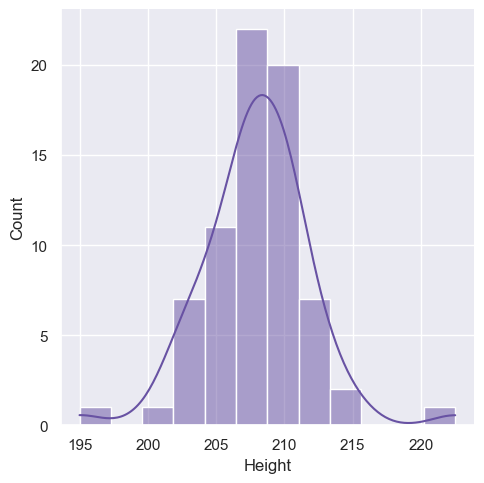

In [27]:
sns.displot(x = 'Height', data = nba_stats_c, kde = True, color = my_color)

In [28]:
print(nba_stats_c['Height'][446])
print(nba_stats_c['Height'][11])
print(nba_stats_c['Height'][8])
print(nba_stats_c['Height'][471])

207.5
215.0
210.0
212.5


In [29]:
nba_stats_c['Height'][446] = np.nan
nba_stats_c['Height'][11] = np.nan
nba_stats_c['Height'][8] = np.nan
nba_stats_c['Height'][471] = np.nan


nba_stats_c['Height'].isna().sum()


4

In [30]:
nba_stats_c['Height'][446] = nba_stats_c.mean()['Height']
nba_stats_c['Height'][11] = nba_stats_c.mean()['Height']
nba_stats_c['Height'][8] = nba_stats_c.mean()['Height']
nba_stats_c['Height'][471] = nba_stats_c.mean()['Height']

print(nba_stats_c.mean()['Height'])

207.75735294117646


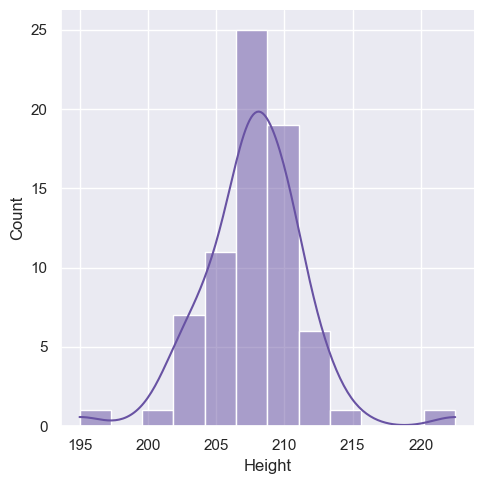

In [31]:
sns.displot(x = 'Height', data = nba_stats_c, kde = True, color = my_color)

In [32]:
nba_stats_c['Height'][446] = nba_stats_c.median()['Height']
nba_stats_c['Height'][11] = nba_stats_c.median()['Height']
nba_stats_c['Height'][8] = nba_stats_c.median()['Height']
nba_stats_c['Height'][471] = nba_stats_c.median()['Height']

print(nba_stats_c.median()['Height'])

207.5


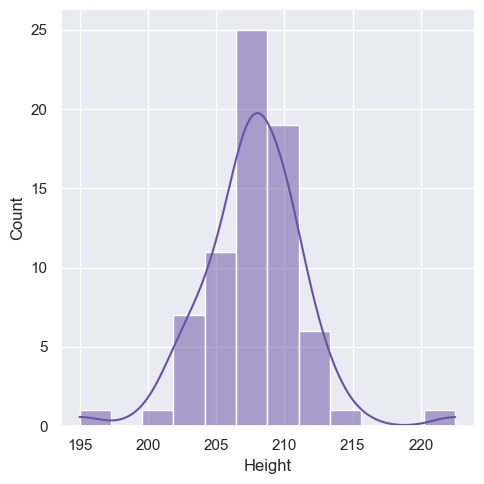

In [33]:
sns.displot(x = 'Height', data = nba_stats_c, kde = True, color = my_color)

Можно сделать вывод о том, что методы заполнения медианными и средними значениями в целом дают довольно близкие результаты.

<span style="color:#6852A3">
<h2>

5. Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью 
   - графиков эмпирических функций распределений, 
   - квантилей, 
   - метода огибающих, 
   - а также стандартных процедур проверкигипотез о нормальности (критерии Колмогорова-Смирнова,Шапиро-Уилка,Андерсона-Дарлинга,Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия). 

</h2>
</span>


In [34]:
data1 = np.random.normal(0, 2, size=50)
data2 = np.random.normal(0, 1, size=50)
data3 = np.random.normal(1, 4, size=5000)
data4 = np.random.normal(11, 3, size=5000)
data5 = np.random.normal(1, 1, size=1000)

**<span style="color:#410083">
Эмпирические функции распределения:
</span>**

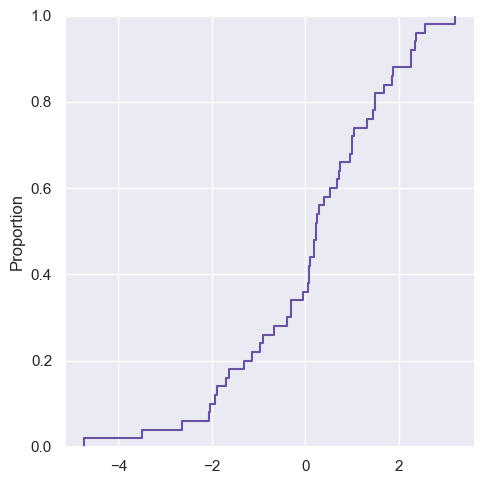

In [35]:
sns.displot(data = data1, kind = "ecdf", color = my_color)

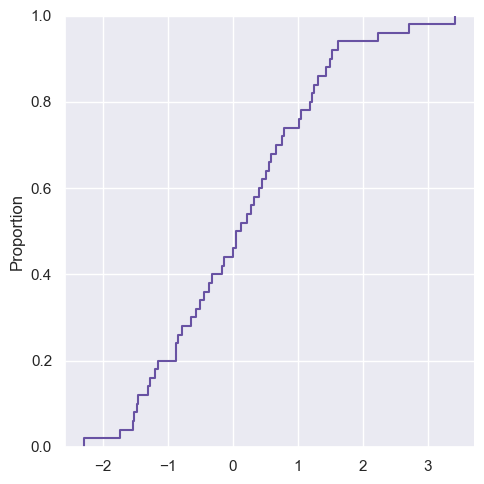

In [36]:
sns.displot(data = data2, kind = "ecdf", color = my_color)

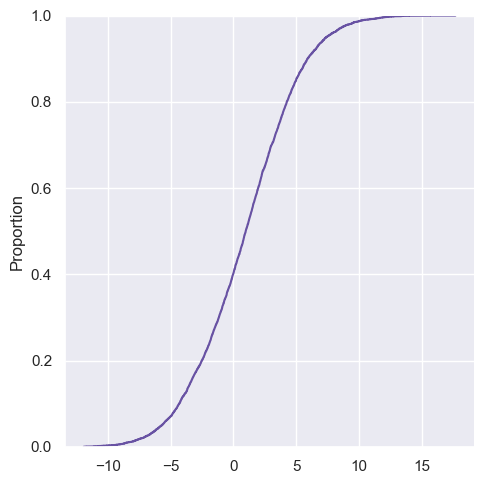

In [37]:
sns.displot(data = data3, kind = "ecdf", color = my_color)

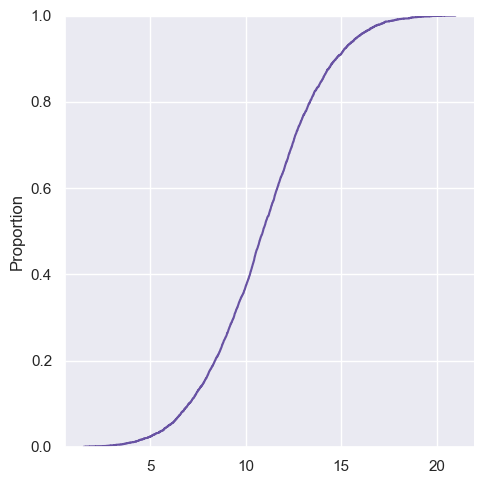

In [38]:
sns.displot(data = data4, kind = "ecdf", color = my_color)

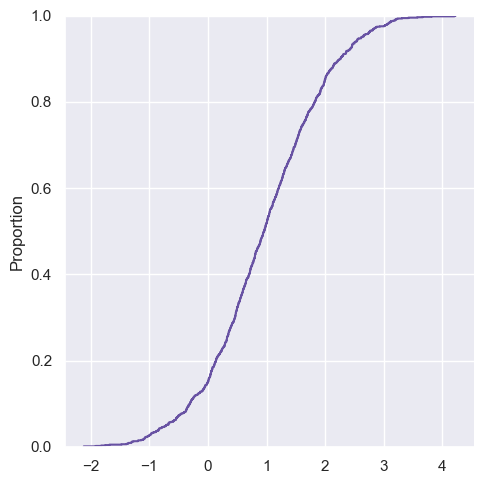

In [39]:
sns.displot(data = data5, kind = "ecdf", color = my_color)

**<span style="color:#410083">
Квантили:
</span>**

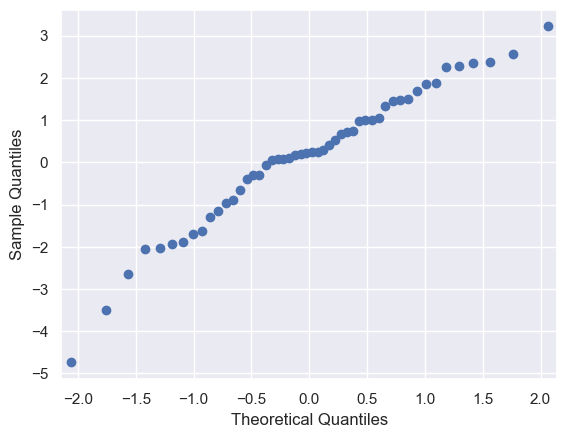

In [40]:
import statsmodels.api as sm

sm.qqplot(data1)
plt.show()

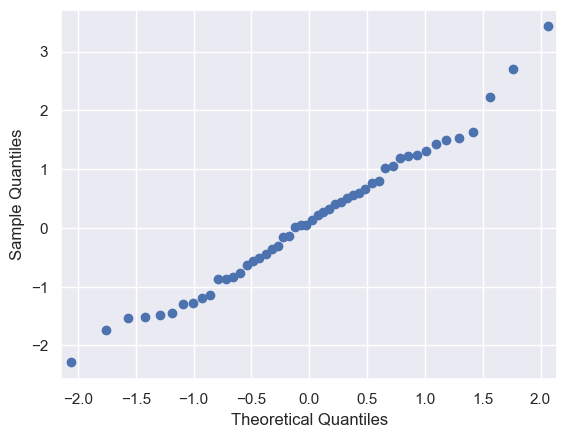

In [41]:
sm.qqplot(data2)
plt.show()

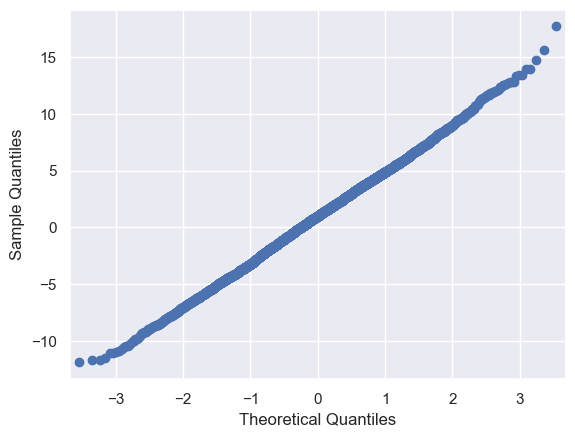

In [42]:
sm.qqplot(data3)
plt.show()

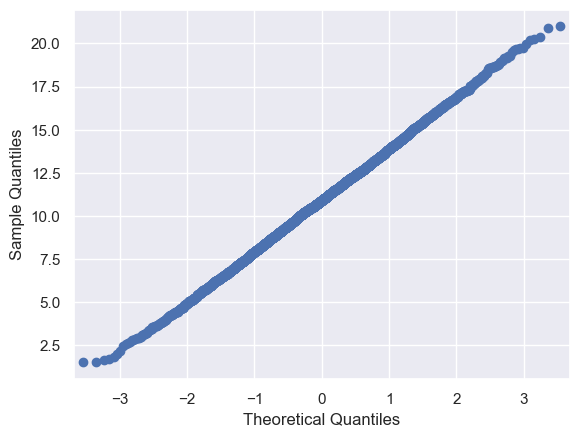

In [43]:
sm.qqplot(data4)
plt.show()

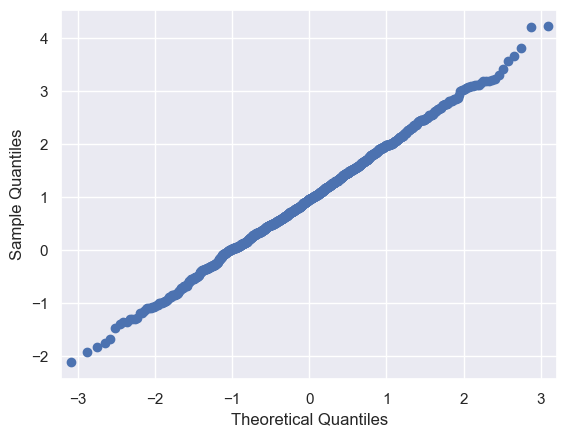

In [44]:
sm.qqplot(data5)
plt.show()

**<span style="color:#410083">
Стандартные процедуры проверки гипотез о нормальности:
</span>**

**<span style="color:#6852A3">
Критерий Колмогорова-Смирнова:
</span>**

In [45]:
from scipy.stats import kstest

print("1: ", kstest(data1, 'norm'))
print("2: ", kstest(data2, 'norm'))
print("3: ", kstest(data3, 'norm'))
print("4: ", kstest(data4, 'norm'))
print("5: ", kstest(data5, 'norm'))

1:  KstestResult(statistic=0.17302015528700088, pvalue=0.08862023026009935)
2:  KstestResult(statistic=0.10780405377645952, pvalue=0.5694579297520962)
3:  KstestResult(statistic=0.38363924471085087, pvalue=0.0)
4:  KstestResult(statistic=0.9953833056207557, pvalue=0.0)
5:  KstestResult(statistic=0.3796730726580877, pvalue=4.501687765679224e-130)


`pvalue` > 0.05 в data1 и data2, значит это стандартные нормальные распределения.


**<span style="color:#6852A3">
Критерий Шапиро-Уилка:
</span>**

In [46]:
from scipy.stats import shapiro

print("1: ", shapiro(data1))
print("2: ", shapiro(data2))
print("3: ", shapiro(data3))
print("4: ", shapiro(data4))
print("5: ", shapiro(data5))

1:  ShapiroResult(statistic=0.9693067073822021, pvalue=0.21687021851539612)
2:  ShapiroResult(statistic=0.9831597805023193, pvalue=0.6905325055122375)
3:  ShapiroResult(statistic=0.9994065761566162, pvalue=0.10634665191173553)
4:  ShapiroResult(statistic=0.9996276497840881, pvalue=0.49080467224121094)
5:  ShapiroResult(statistic=0.9991155862808228, pvalue=0.925866961479187)


`pvalue` > 0.05 везде, значит все данные нормально распределены. 

**<span style="color:#6852A3">
Критерий Андерсона-Дарлинга:
</span>**



In [47]:
from scipy.stats import anderson

print("1: ", anderson(data1))
print("2: ", anderson(data2))
print("3: ", anderson(data3))
print("4: ", anderson(data4))
print("5: ", anderson(data5))

1:  AndersonResult(statistic=0.45582487457956233, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
2:  AndersonResult(statistic=0.20969966633953874, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
3:  AndersonResult(statistic=0.7017137805241873, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
4:  AndersonResult(statistic=0.34319603931544407, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
5:  AndersonResult(statistic=0.21502316034775504, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


**<span style="color:#6852A3">
Критерий Крамера фон Мизеса:
</span>**


In [48]:
from scipy.stats import cramervonmises

print("1: ", cramervonmises(data1, 'norm'))
print("2: ", cramervonmises(data2, 'norm'))
print("3: ", cramervonmises(data3, 'norm'))
print("4: ", cramervonmises(data4, 'norm'))
print("5: ", cramervonmises(data5, 'norm'))

1:  CramerVonMisesResult(statistic=0.5344393738123291, pvalue=0.032178627885974476)
2:  CramerVonMisesResult(statistic=0.12024205025803454, pvalue=0.49592045443879396)
3:  CramerVonMisesResult(statistic=241.85894271810182, pvalue=6.60899142079785e-08)
4:  CramerVonMisesResult(statistic=1665.9981055716746, pvalue=3.077230835701883e-07)
5:  CramerVonMisesResult(statistic=76.35384026161556, pvalue=1.859440013074476e-08)


1 и 2 тест - стандартное нормальное распределение.


**<span style="color:#6852A3">
Критерий Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия:
</span>**

In [49]:
from statsmodels.stats.diagnostic import lilliefors

print("1: ", lilliefors(data1, 'norm'))
print("2: ", lilliefors(data2, 'norm'))
print("3: ", lilliefors(data3, 'norm'))
print("4: ", lilliefors(data4, 'norm'))
print("5: ", lilliefors(data5, 'norm'))

1:  (0.1195650425533808, 0.071004648850802)
2:  (0.05226773466072365, 0.9791419972866983)
3:  (0.009971684302286288, 0.2699723030821681)
4:  (0.010515078781632048, 0.20948015344125884)
5:  (0.016825623402029838, 0.7745689597135935)


`pvalue` > 0.05 во всех тестах (на всех данных). Значит все данные распределены нормально.

<span style="color:#6852A3">
<h2>

6. Продемонстрировать пример анализа данных с помощью графиков квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности. Рассмотреть выборки малого и умеренного объемов.

</h2>
</span>

Рассмотрим распределение возраста игроков в лиге. Выборка малого объема имеет 422 записи, а выборка умеренного объема - 24616.

In [50]:
age_small = nba_stats['Age']
age_small = age_small.dropna()
print(len(age_small))

422


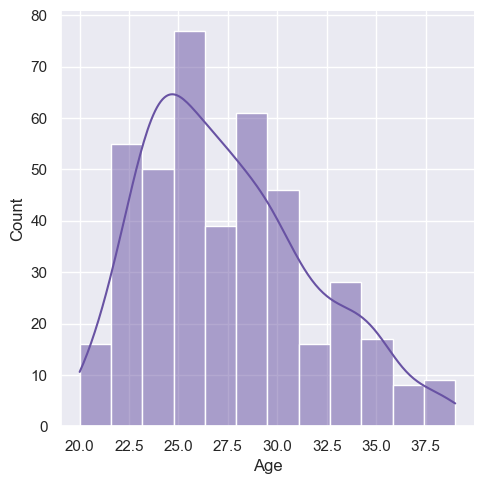

In [51]:
sns.displot(x = 'Age', data = nba_stats, kde = True, color = my_color)

In [52]:
age_big = nba_seasons['Age']
age_big = age_big.dropna()
print(len(age_big))

24616


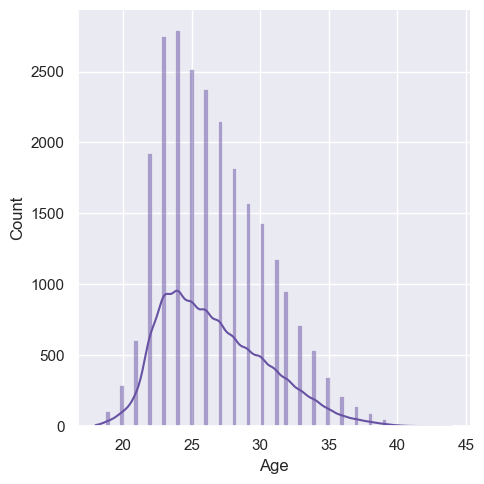

In [53]:
sns.displot(x = 'Age', data = nba_seasons, kde = True, color = my_color)

**<span style="color:#6852A3">
Графики квантилей:
</span>**

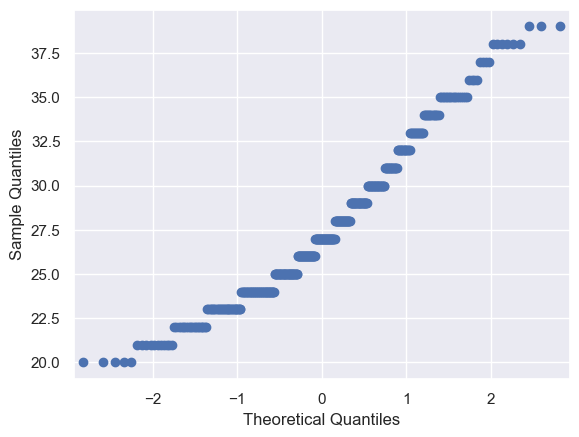

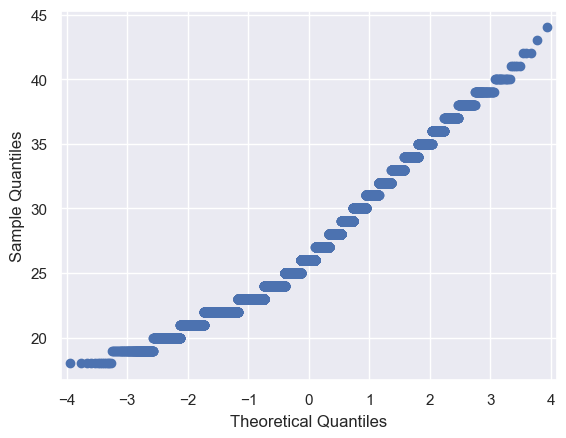

In [54]:
sm.qqplot(age_small)
sm.qqplot(age_big)
plt.show()

**<span style="color:#6852A3">
Гипотезы о нормальности:
</span>**

**Малая выборка:**

In [55]:
print(kstest(age_small, 'norm'))
print(shapiro(age_small))
print(anderson(age_small))
print(cramervonmises(age_small, 'norm'))
print(lilliefors(age_small, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.9571580290794373, pvalue=9.831688796424487e-10)
AndersonResult(statistic=5.672400009454407, critical_values=array([0.571, 0.65 , 0.78 , 0.91 , 1.082]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
CramerVonMisesResult(statistic=140.66666666666669, pvalue=0)
(0.11000548571765262, 0.0009999999999998899)


`p_value` < 0.05 по всем критериям. Значит данные не распределены нормально.</br>
В критерии Андерсона-Дарлинга полученное значение статистики больше критических значений -> нулевая гипотеза $H_0$ о нормальном распределении неверна.

**Умеренная выборка:**

In [56]:
print(kstest(age_big, 'norm'))
print(shapiro(age_big))
print(anderson(age_big))
print(cramervonmises(age_big, 'norm'))
print(lilliefors(age_big, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.9604790806770325, pvalue=0.0)
AndersonResult(statistic=314.8563269767292, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
CramerVonMisesResult(statistic=8205.333333333334, pvalue=0)
(0.1147226994720083, 0.0009999999999998899)


Аналогичная ситуация и с данными умеренной выборки.</br>
**Вывод**: возраст игроков в лиге не распределён нормально.

<span style="color:#6852A3">
<h2>

7. Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев:
- Стьюдента,  включая  односторонние  варианты,  когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних  значений  больше  (или  меньше)  другого.  Реализовать  оценку мощности  критериев  при  заданном  объеме  выборки  или  определения объема выборки для достижения заданной мощности;
- Уилкоксона-Манна-Уитни (ранговые);
- Фишера,  Левене,  Бартлетта,  Флигнера-Килина  (проверка гипотез об однородности дисперсий).

</h2>
</span> 

In [57]:
norm0_4 = np.random.normal(0, 4, size = 100)
norm1_1 = np.random.normal(1, 1, size = 500)
norm0_9 = np.random.normal(0, 9, size = 3000)

from pingouin import ttest

**<span style="color:#6852A3">
Критерий Стьюдента:
</span>**

Нулевая гипотеза $H_0$: средние значения двух выборок не равны (если параметр `alternative = 'two-sided'`) ИЛИ среднее первой выборки больше, чем среднее второй выборки (если параметр `alternative = 'greater'`).</br> Гипотеза верна, если `p_value` > 0.05, и неверна, если `p_value` < 0.05.

**<span style="color:#410083">
Доверительный уровень 0.9:
</span>**

In [58]:
ttest(norm0_4, norm0_9, alternative = 'two-sided', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,1.153553,131.761868,two-sided,0.250772,"[-0.22673954373463462, 1.2668332128886466]",0.05837,0.213,0.088523


In [59]:
ttest(norm0_4, norm0_9, alternative = 'greater', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,1.153553,131.761868,greater,0.125386,"[-0.0606159061413285, inf]",0.05837,0.427,0.142137


In [60]:
ttest(norm0_4, norm1_1, alternative = 'two-sided', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,-1.158973,101.07678,two-sided,0.249198,"[-1.1891565653372063, 0.21137735768286411]",0.254753,0.23,0.641283


In [61]:
ttest(norm0_4, norm1_1, alternative = 'greater', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,-1.158973,101.07678,greater,0.875401,"[-1.0330433400022765, inf]",0.254753,0.46,0.000036


In [62]:
ttest(norm1_1, norm0_9, alternative = 'two-sided', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,5.926877,3327.440908,two-sided,3.402862e-09,"[0.7288538628215686, 1.2890190139867859]",0.120648,1.827e+06,0.70437


In [63]:
ttest(norm1_1, norm0_9, alternative = 'greater', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,5.926877,3327.440908,greater,1.701431e-09,"[0.7907336877007091, inf]",0.120648,3.655e+06,0.802979


**<span style="color:#410083">
Доверительный уровень 0.95:
</span>**

In [64]:
ttest(norm0_4, norm0_9, alternative = 'two-sided', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.153553,131.761868,two-sided,0.250772,"[-0.37, 1.41]",0.05837,0.213,0.088523


In [65]:
ttest(norm0_4, norm0_9, alternative = 'greater', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.153553,131.761868,greater,0.125386,"[-0.23, inf]",0.05837,0.427,0.142137


In [66]:
ttest(norm0_4, norm1_1, alternative = 'two-sided', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.158973,101.07678,two-sided,0.249198,"[-1.33, 0.35]",0.254753,0.23,0.641283


In [67]:
ttest(norm0_4, norm1_1, alternative = 'greater', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.158973,101.07678,greater,0.875401,"[-1.19, inf]",0.254753,0.46,0.000036


In [68]:
ttest(norm1_1, norm0_9, alternative = 'greater', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.926877,3327.440908,greater,1.701431e-09,"[0.73, inf]",0.120648,3.655e+06,0.802979


In [69]:
ttest(norm1_1, norm0_9, alternative = 'greater', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.926877,3327.440908,greater,1.701431e-09,"[0.73, inf]",0.120648,3.655e+06,0.802979


**<span style="color:#410083">
Доверительный уровень 0.99:
</span>**

In [70]:
ttest(norm0_4, norm0_9, alternative = 'two-sided', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,1.153553,131.761868,two-sided,0.250772,"[-0.658246707587614, 1.698340376741626]",0.05837,0.213,0.088523


In [71]:
ttest(norm0_4, norm0_9, alternative = 'greater', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,1.153553,131.761868,greater,0.125386,"[-0.5416301659582378, inf]",0.05837,0.427,0.142137


In [72]:
ttest(norm0_4, norm1_1, alternative = 'two-sided', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-1.158973,101.07678,two-sided,0.249198,"[-1.596340116868773, 0.6185609092144307]",0.254753,0.23,0.641283


In [73]:
ttest(norm0_4, norm1_1, alternative = 'greater', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-1.158973,101.07678,greater,0.875401,"[-1.486014739280165, inf]",0.254753,0.46,0.000036


In [74]:
ttest(norm1_1, norm0_9, alternative = 'greater', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,5.926877,3327.440908,greater,1.701431e-09,"[0.6127297255536298, inf]",0.120648,3.655e+06,0.802979


In [75]:
ttest(norm1_1, norm0_9, alternative = 'greater', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,5.926877,3327.440908,greater,1.701431e-09,"[0.6127297255536298, inf]",0.120648,3.655e+06,0.802979


**<span style="color:#6852A3">
Критерий Уилкоксона-Манна-Уитни:
</span>**

Из документации к функции `mannwhineyu()`:
```
    We use the Mann-Whitney U test to assess whether there is a statistically
    significant difference in the diagnosis age of males and females.
    The null hypothesis is that the distribution of male diagnosis ages is
    the same as the distribution of female diagnosis ages. We decide
    that a confidence level of 95% is required to reject the null hypothesis
    in favor of the alternative that the distributions are different.
    Since the number of samples is very small and there are no ties in the
    data, we can compare the observed test statistic against the *exact*
    distribution of the test statistic under the null hypothesis.
```

Доверительный интервал = 0.95

Нулевая гипотеза $H_0$: распределения двух выборок не равны (параметр `alternative = 'two-sided`') ИЛИ распределение первой выборки стохастически больше распределения второй выборки (параметр `alternative = 'greater'`).</br> 
Гипотеза верна, если `p_value` > 0.05, и неверна, если `p_value` < 0.05.

In [76]:
pois1 = np.random.poisson(7, 14)
pois3 = np.random.poisson(7, 7)
pois2 = np.random.poisson(14, 7)

In [77]:
from scipy.stats import mannwhitneyu

print(mannwhitneyu(pois1, pois2, alternative='two-sided'))
print(mannwhitneyu(pois1, pois3, alternative='two-sided'))
print(mannwhitneyu(pois3, pois2, alternative='two-sided'))
print(mannwhitneyu(pois1, pois2, alternative='greater'))
print(mannwhitneyu(pois1, pois3, alternative='greater'))
print(mannwhitneyu(pois3, pois2, alternative='greater'))

MannwhitneyuResult(statistic=2.0, pvalue=0.000475543240873116)
MannwhitneyuResult(statistic=31.5, pvalue=0.19801539634338883)
MannwhitneyuResult(statistic=4.0, pvalue=0.010432890182919985)
MannwhitneyuResult(statistic=2.0, pvalue=0.9998210389920275)
MannwhitneyuResult(statistic=31.5, pvalue=0.9135501680826477)
MannwhitneyuResult(statistic=4.0, pvalue=0.9964188082721269)


**<span style="color:#6852A3">
Критерии Фишера,  Левене,  Бартлетта,  Флигнера-Килина  (проверка гипотез об однородности дисперсий):
</span>**

Нулевая гипотеза $H_0$: дисперсии двух выборок равны. </br>
Гипотеза верна, если `p_value` > 0.05, и неверна, если `p_value` < 0.05.

In [78]:
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import fligner

In [79]:
print(levene(norm0_9, norm0_4))
print(levene(norm1_1, norm0_4))
print(levene(norm0_9, norm1_1))

LeveneResult(statistic=49.54173299862284, pvalue=2.381042873378456e-12)
LeveneResult(statistic=455.71393835980666, pvalue=1.3615628355862607e-75)
LeveneResult(statistic=711.5372559850482, pvalue=7.419206253274827e-143)


In [80]:
print(bartlett(norm0_9, norm0_4))
print(bartlett(norm1_1, norm0_4))
print(bartlett(norm0_9, norm1_1))

BartlettResult(statistic=72.7600542885811, pvalue=1.4641044258315983e-17)
BartlettResult(statistic=535.5247989644492, pvalue=1.7742323489716589e-118)
BartlettResult(statistic=1704.1738362344904, pvalue=0.0)


In [81]:
print(fligner(norm0_9, norm0_4))
print(fligner(norm1_1, norm0_4))
print(fligner(norm0_9, norm1_1))

FlignerResult(statistic=49.20888259882598, pvalue=2.301063714025032e-12)
FlignerResult(statistic=225.9499723843629, pvalue=4.556375970868506e-51)
FlignerResult(statistic=658.9297091561592, pvalue=2.553263189206746e-145)


<span style="color:#6852A3">
<h2>

8. Исследовать корреляционные взаимосвязи вданных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла.

</h2>
</span>

**<span style="color:#6852A3">
Коэффициент корреляции Пирсона:
</span>**

In [82]:
from scipy.stats import pearsonr

names = ['Age',  'PTS',  'Height', 'Weight', 'FGM','AST', 'STL', 'BLK']
data = nba_stats[names]
data = data.dropna()

print('Height / BLK:', pearsonr(data['Height'], data['BLK']))
print('Height / AST:',pearsonr(data['Height'], data['AST']))
print('Height / STL:',pearsonr(data['Height'], data['STL']))

Height / BLK: PearsonRResult(statistic=0.4598498367787574, pvalue=1.8048892179395132e-23)
Height / AST: PearsonRResult(statistic=-0.36580665368133997, pvalue=8.292216287886863e-15)
Height / STL: PearsonRResult(statistic=-0.16426314972308145, pvalue=0.0007055152427373476)


**<span style="color:#6852A3">
Коэффициент корреляции Спирмена:
</span>**

In [83]:
from scipy.stats import spearmanr

print('Height / BLK:',spearmanr(data['Height'], data['BLK']))
print('Height / AST:',spearmanr(data['Height'], data['AST']))
print('Height / STL:',spearmanr(data['Height'], data['STL']))

Height / BLK: SpearmanrResult(correlation=0.49086355566615714, pvalue=5.663041101407075e-27)
Height / AST: SpearmanrResult(correlation=-0.28101517435422446, pvalue=4.242236021144623e-09)
Height / STL: SpearmanrResult(correlation=-0.13080153488531007, pvalue=0.007132209027723288)


**<span style="color:#6852A3">
Коэффициент корреляции Кендалла:
</span>**

In [84]:
from scipy.stats import kendalltau

print('Height / BLK:',kendalltau(data['Height'], data['BLK']))
print('Height / AST:',kendalltau(data['Height'], data['AST']))
print('Height / STL:',kendalltau(data['Height'], data['STL']))

Height / BLK: KendalltauResult(correlation=0.3590468934834969, pvalue=1.1909574779196414e-25)
Height / AST: KendalltauResult(correlation=-0.19970873222355925, pvalue=3.939647458259811e-09)
Height / STL: KendalltauResult(correlation=-0.0923392307660423, pvalue=0.0066656373362833)


<span style="color:#6852A3">
<h2>

9. Продемонстрировать использование методов 
- хи-квадрат, 
- точного теста Фишера, 
- теста МакНемара, 
- теста Кохрана-Мантеля-Хензеля.

</h2>
</span>

**<span style="color:#6852A3">
хи-квадрат:
</span>**

In [85]:
from scipy.stats import chisquare


obs = nba_stats_c['Height']
exp = [nba_stats_c['Height'].mean()]*nba_stats_c.shape[0]
print(chisquare(f_obs=obs, f_exp=exp))

obs = nba_stats_c['Weight']
exp = [nba_stats_c['Weight'].mean()]*nba_stats_c.shape[0]
print(chisquare(f_obs=obs, f_exp=exp))

obs = nba_stats_c['Age']
exp = [nba_stats_c['Age'].mean()]*nba_stats_c.shape[0]
print(chisquare(f_obs=obs, f_exp=exp))

Power_divergenceResult(statistic=4.823249206083904, pvalue=1.0)
Power_divergenceResult(statistic=45.216488082221744, pvalue=0.9927109810649787)
Power_divergenceResult(statistic=43.72166998011929, pvalue=0.995538512511413)


`pvalue` > 0.05. Делаем вывод о том, что среди игроков на центровой позиции рост, вес и возраст в среднем примерно одинаков.

**<span style="color:#6852A3">
Точный тест Фишера:
</span>**

In [86]:
center_pts = nba_stats[nba_stats['Pos'] == 'C'].PTS.mean()
pg_pts = nba_stats[nba_stats['Pos'] == 'PG'].PTS.mean()
sf_pts = nba_stats[nba_stats['Pos'] == 'SF'].PTS.mean()

center_ast = nba_stats[nba_stats['Pos'] == 'C'].AST.mean()
pg_ast = nba_stats[nba_stats['Pos'] == 'PG'].AST.mean()
sf_ast = nba_stats[nba_stats['Pos'] == 'SF'].AST.mean()

center_stl = nba_stats[nba_stats['Pos'] == 'C'].STL.mean()
pg_stl = nba_stats[nba_stats['Pos'] == 'PG'].STL.mean()
sf_stl = nba_stats[nba_stats['Pos'] == 'SF'].STL.mean()

k = [[center_pts, pg_pts], [center_ast, pg_ast]]
print(k)

k1 = [[center_pts, sf_pts], [center_ast, sf_ast]]
print(k1)

k2 = [[pg_pts, sf_pts], [pg_ast, sf_ast]]
print(k2)

k3 = [[pg_pts, sf_pts], [pg_stl, sf_stl]]
print(k3)

k4 = [[pg_pts, center_pts], [pg_stl, center_stl]]
print(k4)

k5 = [[center_pts, sf_pts], [center_stl, sf_stl]]
print(k5)

[[504.18055555555554, 556.75], [71.59722222222223, 225.96428571428572]]
[[504.18055555555554, 496.6578947368421], [71.59722222222223, 87.05263157894737]]
[[556.75, 496.6578947368421], [225.96428571428572, 87.05263157894737]]
[[556.75, 496.6578947368421], [49.642857142857146, 41.473684210526315]]
[[556.75, 504.18055555555554], [49.642857142857146, 31.15277777777778]]
[[504.18055555555554, 496.6578947368421], [31.15277777777778, 41.473684210526315]]


**<span style="color:#6852A3">
тест МакНемара:
</span>**

In [87]:
from scipy.stats import fisher_exact

print(fisher_exact(k))
print(fisher_exact(k1))
print(fisher_exact(k2))
print(fisher_exact(k3))
print(fisher_exact(k4))
print(fisher_exact(k5))

(2.872631472286959, 1.494030281289387e-13)
(1.245115856428896, 0.23063081310415287)
(0.43344086021505374, 1.0897700865136263e-09)
(0.9379526003949967, 0.8261395894627419)
(0.6979267897635244, 0.13278977384648125)
(1.3439125910509886, 0.2720998899943202)


<span style="color:#6852A3">
<h2>

10.  Проверить наличие мультиколлинеарности в данных с помощью 
- корреляционной матрицы
- фактора инфляции дисперсии.

</h2>
</span>

**<span style="color:#6852A3">
Корреляционная матрица:
</span>**

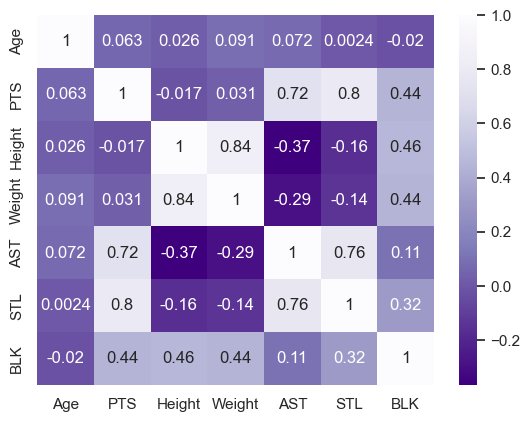

In [88]:
names = ['Age',  'PTS',  'Height', 'Weight', 'AST', 'STL', 'BLK']

data = nba_stats[names]
data = data.dropna() # удаление строк с пропусками

fig = plt.figure()
sns.heatmap(data.corr(), cmap="Purples_r", annot=True)  

plt.show()

Итак, мы можем видеть, что существуют некоторые зависимости.
- Существует строго негативная корреляция между весом (Height) игрока и количеством его результативных передач (AST). Действительно, высокие игроки скорее чаще получают пасы и завершают атаку, нежели пасуются сами.
- Существует положительная корреляция между весом (Weight), ростом (Height) и блокшотами (BLK). Это соотносится с реальностью, крепкие игроки легко "закрывают" бросок более низких противников.
- Есть небольшая положительная корреляция между возрастом (Age) игрока и его набранными очками (PTS), но она не настолько сильная, как это могло бы ожидаться.

**<span style="color:#6852A3">
Фактор инфляции дипсперсии:
</span>**

**Фактор инфляции дисперсии** — это мера мультиколлинеарности, которая существует в наборе переменных, участвующих в множественных регрессиях.

Как правило, значение vif выше 10 указывает на высокую корреляцию с другими независимыми переменными.

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 

names = [ 'pts',  'player_height', 'player_weight', 'ast', 'reb', 'gp']

data = nba_players[names]
data = data.dropna() # удаление строк с пропусками

X = add_constant(data)  
ds = pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)

const            1156.930429
pts                 3.147758
player_height       3.692932
player_weight       3.308923
ast                 2.574216
reb                 2.773611
gp                  1.495791
dtype: float64


Данный метод не указывает на наличие корреляции моих данных, а именно взаимосвязи характеристик игрока и его игровых показателях. 

<span style="color:#6852A3">
<h2>

11.  Исследовать  зависимости  в  данных  с  помощью  дисперсионного анализа.

</h2>
</span>

In [90]:
import scipy.stats as stats
from scipy.stats import f_oneway

c_pts = nba_stats[nba_stats['Pos'] == 'C']['PTS']
pg_pts = nba_stats[nba_stats['Pos'] == 'PG']['PTS']

c_ast = nba_stats[nba_stats['Pos'] == 'C']['AST']
pg_ast = nba_stats[nba_stats['Pos'] == 'PG']['AST']

c_stl = nba_stats[nba_stats['Pos'] == 'C']['STL']
pg_stl = nba_stats[nba_stats['Pos'] == 'PG']['STL']

print(stats.f_oneway(c_pts, pg_pts))
print(stats.f_oneway(c_ast, pg_ast))
print(stats.f_oneway(c_stl, pg_ast))

F_onewayResult(statistic=0.5985695617039988, pvalue=0.44031034129506275)
F_onewayResult(statistic=47.12073364294072, pvalue=1.537605699741845e-10)
F_onewayResult(statistic=87.43430258165738, pvalue=9.70138591158959e-17)


Значение `pvalue` в сравнении количестве результативных передач (AST) и перехватов (STL) < 0.05. Можем сделать вывод о том, что эти показатели для игроков центровой и разыгрывающий не эквивалентны. </br>
Что касается количества очков (PTS), то разницы нет. Значит игроки и на той, и на другой позиции с одинаковым успехом набирают очки в игре.


<span style="color:#6852A3">
<h2>

1.   Подогнать регрессионные модели  к данным, а также оценить качество подобной аппроксимации

</h2>
</span>

**<span style="color:#6852A3">
Линейная регрессионная модель:
</span>**

**Модель линейной регрессии** устанавливает связь между зависимой переменной ( y ) и по крайней мере одной независимой переменной ( x ) как:

$$ \widetilde{y} = b_1 \cdot x + b_0 $$

В методе OLS мы должны выбрать $b_1$ значения, а также $b_0$ таким образом, чтобы минимизировать общую сумму квадратов разницы между вычисленными и наблюдаемыми значениями y. </br>
**Формула для OLS**:

$$ S = \sum_{i=1}^{n} (y_i - \widetilde{y_i})^2 = \sum_{i=1}^{n} (y_i - b_1 \cdot x - b_0)^2 = \sum_{i=1}^{n} (\widetilde{\xi})^2 = min $$

Где, </br>
$\widetilde{y_i}$ = прогнозируемое значение для i-го наблюдения </br>
$y_i$ = фактическое значение для i-го наблюдения </br>
$\widetilde{\xi}$ = ошибка / невязка для i-го наблюдения </br>
$n$ = общее количество наблюдений </br>

Чтобы получить значения $b_1$, а также  $b_0$, которые минимизируют $S$, мы можем взять частную производную для каждого коэффициента и приравнять ее к нулю.

<p align="center"><img
 src = "/Users/mazur/Desktop/PRAK_5sem/linear_regression.png"
 alt= "drawing"
 width= "400"
/></p>

Будем рабоать со следующими данными:</br>
3PA - (3 Points Attempt) все попытки трёхочкового броска
3PM - (3 Points Made) реализованные трёхочковые броски, попавшие в кольцо

In [91]:
x = nba_stats["3PA"]
y = nba_stats["3PM"]

x = sm.add_constant(x)
result = sm.OLS(y, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    3PM   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:47:31   Log-Likelihood:                -1663.5
No. Observations:                 490   AIC:                             3331.
Df Residuals:                     488   BIC:                             3339.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4235      0.436     -5.560      0.0

Получили следующую формулу: $$3PM =  0.3716 \cdot 3PA - 2.4235$$

Сравним результаты с реальными. По официальной статистике NBA на данный момент процент попадания трёхочковых бросков составляет 34.9 %. </br>
Учитывая, что линейную модель выше я строила на данных умеренного размера, это очень хороший и довольно точный результат.

Другие виды регрессий:
- Логистическая регрессия
- Полиномиальная регрессия
- Квантильная регрессия
- Лассо-регрессия / Ридж-регрессия
- Метод главных компонент
- Регрессия наименьших частичных квадратов
- Порядковая регрессия
- Регрессия Пуассона / Отрицательная биноминальная регрессия
- Регрессия Кокса